## Sigmoid 함수

In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

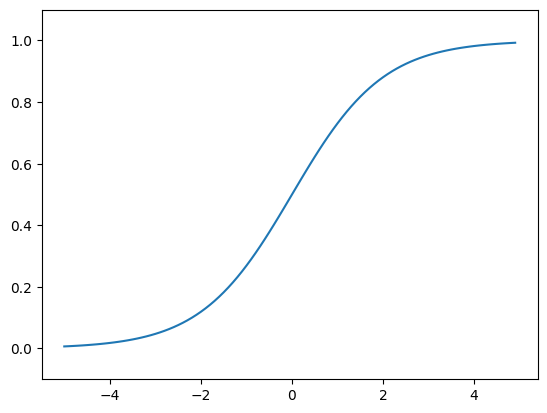

In [3]:
# 그래프 그려보기
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

## Tanh 함수

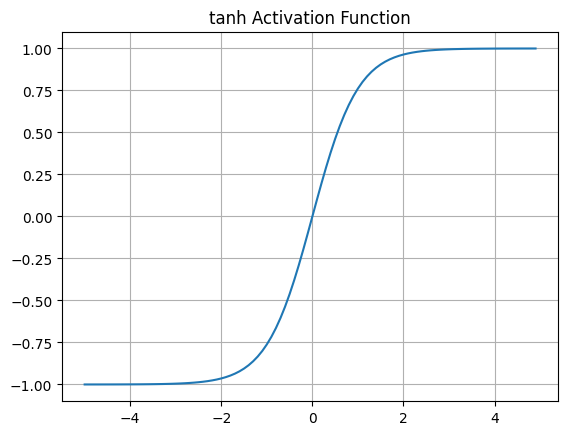

In [4]:
import numpy as np
import matplotlib.pylab as plt

def tanh(x):
    return np.tanh(x)

# 그래프 그리기
x = np.arange(-5.0, 5.0, 0.1)
y = tanh(x)
plt.plot(x,y)
plt.ylim(-1.1, 1.1) #y축 범위 설정
plt.title("tanh Activation Function")
plt.grid()
plt.show()

## ReLU 함수

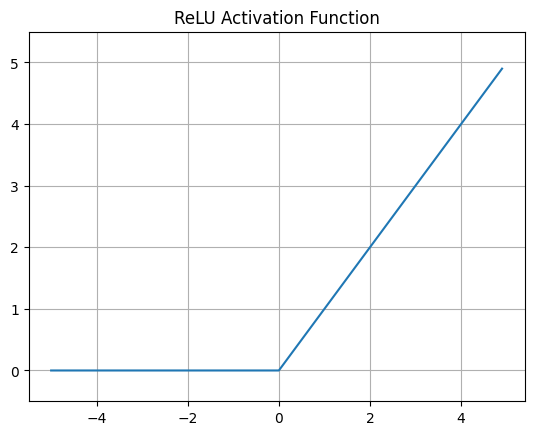

In [5]:
import numpy as np
import matplotlib.pylab as plt

def relu(x):
    return np.maximum(0,x)

# 그래프 그리기
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.5,5.5) # y축 범위 설정
plt.title("ReLU Activation Function")
plt.grid()
plt.show()

## 텐서플로우(tensorflow)

##### TensorFlow를 활용한 y = 2x + 1 선형회귀 모델 예측 예제

In [6]:
### TensorFlow를 활용한 y = 2x + 1 선형회귀 모델 예측 예제 ###
import tensorflow as tf
import numpy as np

In [7]:
# 폰트 지정
plt.rcParams['font.family'] = 'NanumGothic'

In [8]:
# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

In [9]:
# 1. 데이터 준비
# x_data: 입력 데이터, y_data: 실제 값(정답)
x_data = np.array([0,1,2,3,4], dtype = np.float32)
y_data = np.array([1, 3, 5, 7, 9], dtype=np.float32)

In [10]:
# 2. 모델 정의
# 가중치(w)와 편향(b)를 변수로 정의
w = tf.Variable(0.0) # 초기 가중치
b = tf.Variable(0.0) # 초기 편향

In [11]:
# 예측 함수 (y = wx + b)
def predict(x):
    return w * x + b

In [12]:
# 3. 손실 함수 정의
# 평균 제곱 오차 (Mean Squared Error, MSE) 사용
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

In [13]:
# 4. 최적화 알고리즘 선택
optimizer = tf.optimizers.SGD(learning_rate=0.01) # 확률적 경사 하강법

In [14]:
# 5. 학습 과정
for step in range(1000): # 100번 반복
    with tf.GradientTape() as tape:
        y_pred = predict(x_data) # 예측값
        loss = loss_fn(y_data, y_pred) # 손실 계산
    # 가중치와 편향에 대한 경사도 계산 및 업데이트
    gradients = tape.gradient(loss, [w,b])
    optimizer.apply_gradients(zip(gradients, [w,b]))
    
    if step % 10 == 0: #10번 마다 로그 출력
        print(f"Step {step}, Loss: {loss.numpy()}, w: {w.numpy()}, b: {b.numpy()}")

Step 0, Loss: 33.0, w: 0.2800000011920929, b: 0.09999999403953552
Step 10, Loss: 1.8755830526351929, w: 1.6574040651321411, b: 0.6004058718681335
Step 20, Loss: 0.1229294165968895, w: 1.9802603721618652, b: 0.7298945188522339
Step 30, Loss: 0.02239181473851204, w: 2.053251266479492, b: 0.7707916498184204
Step 40, Loss: 0.014991003088653088, w: 2.0671944618225098, b: 0.7900874018669128
Step 50, Loss: 0.013025244697928429, w: 2.0673303604125977, b: 0.8037028312683105
Step 60, Loss: 0.011540031060576439, w: 2.06437611579895, b: 0.8154456615447998
Step 70, Loss: 0.010236968286335468, w: 2.0608623027801514, b: 0.8262498378753662
Step 80, Loss: 0.009081726893782616, w: 2.0573794841766357, b: 0.8363654017448425
Step 90, Loss: 0.00805690512061119, w: 2.0540578365325928, b: 0.8458786010742188
Step 100, Loss: 0.007147765718400478, w: 2.050919771194458, b: 0.854835569858551
Step 110, Loss: 0.006341210100799799, w: 2.047961473464966, b: 0.863271176815033
Step 120, Loss: 0.005625654477626085, w: 2.

In [15]:
# 6. 예측 및 결과 확인
print("Final Parameters:", f"w={w.numpy()}, b={b.numpy()}")
print("Prediction for x=5:", predict(5).numpy())

Final Parameters: w=2.000235080718994, b=0.9993311762809753
Prediction for x=5: 11.000506


### keras를 활용한 y = 2x + 1 선형회귀 모델 예측 예제

In [17]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
# 1. 데이터 준비
# 입력(x)과 출력(y) 데이터를 정의합니다.
x_data = np.array([0, 1, 2, 3, 4], dtype=np.float32)  # 입력 데이터
y_data = np.array([1, 3, 5, 7, 9], dtype=np.float32)  # 정답 데이터

In [20]:
# 2. 모델 정의
# Sequential API를 사용해 신경망을 정의합니다.
model = Sequential([
    Dense(1, input_dim=1)  # 입력 1개, 출력 1개 (선형 회귀)
])

In [21]:
# 3. 모델 컴파일
# 손실 함수와 옵티마이저를 설정합니다.
model.compile(optimizer='sgd', loss='mse')

In [22]:
# 4. 모델 학습
# fit() 메서드로 데이터를 학습시킵니다.
model.fit(x_data, y_data, epochs=50, verbose=1)  # 50번 반복 학습

Epoch 1/50
1/1 [==============================] - 0s 241ms/step - loss: 30.0733
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 22.5591
Epoch 3/50
1/1 [==============================] - 0s 4ms/step - loss: 16.9242
Epoch 4/50
1/1 [==============================] - 0s 5ms/step - loss: 12.6985
Epoch 5/50
1/1 [==============================] - 0s 4ms/step - loss: 9.5295
Epoch 6/50
1/1 [==============================] - 0s 4ms/step - loss: 7.1530
Epoch 7/50
1/1 [==============================] - 0s 8ms/step - loss: 5.3708
Epoch 8/50
1/1 [==============================] - 0s 9ms/step - loss: 4.0342
Epoch 9/50
1/1 [==============================] - 0s 7ms/step - loss: 3.0318
Epoch 10/50
1/1 [==============================] - 0s 6ms/step - loss: 2.2801
Epoch 11/50
1/1 [==============================] - 0s 6ms/step - loss: 1.7162
Epoch 12/50
1/1 [==============================] - 0s 10ms/step - loss: 1.2934
Epoch 13/50
1/1 [==============================] - 0s 7ms/step - l

In [26]:
# 5. 예측 및 평가
# 새로운 데이터로 예측 수행
x_new = np.array([5], dtype=np.float32)
y_new = model.predict(x_new)

print(f"x = 5일 때, 예측된 y = {y_new[0][0]:.2f}")

x = 5일 때, 예측된 y = 11.16


## MNIST 예제 (CNN모델 예제)

In [27]:
# 1. 필요한 라이브러리 임포트
import tensorflow as tf # 딥러닝 라이브러리
from tensorflow.keras import layers, models # 신경망 계층 및 모델 설계
from tensorflow.keras.datasets import mnist # MNIST 데이터셋
import matplotlib.pyplot as plt # 시각화 도구

In [29]:
# 2. 데이터 로드 및 전처리
# MNIST 데이터셋은 이미 나뉘어 제공 (학습/테스트 데이터)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [30]:
# MNIST 이미지는 28x28 크기, 채널 정보 추가 (흑백 이미지는 채널 1개)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255.0  # 0~1로 정규화
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') /  255.0

In [31]:
# 레이블을 One-Hot Encoding (숫자를 0~9를 벡터로 변환)
# One-Hot Encoding : 범주형 데이터를 수치형 데이터로 변환하는 방법
if len(y_train.shape) == 1: # shape이 (n,)인지 확인
    y_train = tf.keras.utils.to_categorical(y_train, 10)
if len(y_test.shape) == 1:  # shape이 (n,)인지 확인
    y_test = tf.keras.utils.to_categorical(y_test, 10)

In [32]:
# 3. CNN 모델 정의
model = models.Sequential() #순차적 모델 선언

In [33]:
# 첫 번째 합성곱 계층: 필터 크기 3x3, 필터 수 32, 활성화 함수 ReLU
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
# 풀링 계층: 2x2 크기로 다운샘플링
model.add(layers.MaxPooling2D((2,2)))

In [34]:
# 두 번째 합성곱 계층: 필터 수 64
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

In [35]:
# 세 번째 합성곱 계층: 필터 수 64
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [36]:
# Fully Connected Layer를 연결하기 위해 Flatten 처리
model.add(layers.Flatten())

In [37]:
# Fully Connected Layer 1: 뉴런 수 64, 활성화 함수 ReLU
model.add(layers.Dense(64, activation='relu'))

In [38]:
# 출력층: 뉴런 수 10(클래스 수), 활성화 함수 Softmax
model.add(layers.Dense(10, activation='softmax'))

In [39]:
# 모델 요약 출력 (구조 확인용)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

In [40]:
# 4. 모델 컴파일
model.compile(optimizer='adam',               # 최적화 알고리즘
              loss='categorical_crossentropy', # 다중 클래스 분류 손실 함수
              metrics=['accuracy'])           # 평가 지표: 정확도

In [41]:
# 5. 모델 학습
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 28s 37ms/step - loss: 0.2169 - accuracy: 0.9321 - val_loss: 0.0767 - val_accuracy: 0.9776
Epoch 2/5
750/750 [==============================] - 28s 38ms/step - loss: 0.0589 - accuracy: 0.9819 - val_loss: 0.0530 - val_accuracy: 0.9848
Epoch 3/5
750/750 [==============================] - 33s 44ms/step - loss: 0.0395 - accuracy: 0.9881 - val_loss: 0.0433 - val_accuracy: 0.9878
Epoch 4/5
750/750 [==============================] - 28s 37ms/step - loss: 0.0314 - accuracy: 0.9901 - val_loss: 0.0463 - val_accuracy: 0.9862
Epoch 5/5
750/750 [==============================] - 29s 39ms/step - loss: 0.0249 - accuracy: 0.9920 - val_loss: 0.0416 - val_accuracy: 0.9879


In [42]:
# 6. 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"테스트 정확도: {test_acc:.4f}")

313/313 [==============================] - 1s 5ms/step - loss: 0.0350 - accuracy: 0.9881
테스트 정확도: 0.9881


In [43]:
# 7. 결과 확인: 테스트 데이터에서 임의의 이미지 예측
import numpy as np

In [44]:
# 테스트 데이터에서 첫 번째 샘플을 가져옴
sample_image = x_test[0] # 첫번 째 이미지 저장
sample_label = np.argmax(y_test[0]) # y_test[0] 배열에서 가장 큰 값을 가지는 요소의 인덱스를 찾아 sample_label 변수에 저장합니다.

In [45]:
# 모델로 예측 수행
predicted_label = np.argmax(model.predict(sample_image.reshape(1,28,28,1)))

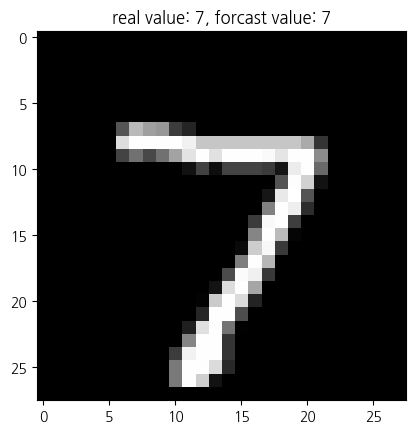

In [46]:
# 결과 출력
plt.imshow(sample_image.reshape(28,28), cmap='gray')
plt.title(f"real value: {sample_label}, forcast value: {predicted_label}")
plt.show()

## RNN 및 LSTM 예제

#### 기본 구조 예제

In [48]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [50]:
# 1. 데이터 준비
# 간단한 시계열 데이터 생성(y=x_t + x+{t-1})
def generate_data(seq_length, n_samples):
    X,y = [], []
    for _ in range(n_samples):
        seq = np.random.rand(seq_length)
        X.append(seq[:-1])  # 마지막 값을 제외한 입력 시퀀스
        y.append(seq[-1])   # 마지막 값이 타겟
    return np.array(X), np.array(y)

seq_length = 10
n_samples = 1000
X, y = generate_data(seq_length, n_samples)

In [51]:
# 데이터 차원 변환 (RNN/LSTM 입력 형식: (samples, timesteps, features))
X = X.reshape((X.shape[0], X.shape[1], 1))  # features = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [52]:
# 2. 모델 정의
#RNN 모델
rnn_model = Sequential([
    SimpleRNN(10, activation='tanh', input_shape=(seq_length -1, 1)),
    Dense(1)    # 출력값
])

In [54]:
# LSTM 모델
lstm_model = Sequential([
    LSTM(10, activation='tanh', input_shape=(seq_length - 1, 1)),
    Dense(1) # 출력값
])

In [55]:
# 3. 모델 컴파일
for model in [rnn_model, lstm_model]:
    model.compile(optimizer='adam', loss='mse')

In [56]:
# 4. 모델 학습
print("Training RNN model...")
rnn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
print("Training LSTM model...")
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

Training RNN model...
Training LSTM model...


In [57]:
# 5. 예측 및 평가
rnn_predictions = rnn_model.predict(X_test)
lstm_predictions = lstm_model.predict(X_test)

In [58]:
# 모델 성능 평가
rnn_mse = mean_squared_error(y_test, rnn_predictions)
lstm_mse = mean_squared_error(y_test, lstm_predictions)

In [59]:
print(f"RNN MSE: {rnn_mse:.4f}")
print(f"LSTM MSE: {lstm_mse:.4f}")

RNN MSE: 0.0768
LSTM MSE: 0.0769
